# Differential Evolution

Optimización de la función de rastrigin:

- 20 dimensiones
- 100 individuos
- Cien mil iteraciones
- 30 experimentos (corridas)

El parámetro de tamaño del paso $F$ se definió a $1.6$ para todos los individuos.
La probabilidad de cruce se definió en $0.6$

Procedimiento: 

1. Se inicializa aleatoriamente con distribución uniforme la población.
2. Siguiente generación:
    1. Para cada individuo de la población (target) se eligen al azar otros 3 individuos (muestra sin reemplazo) que se denominarán base, ind_1 e ind_2.
    2. Creación del donante:
        1. se calcula el vector de ind_2 a ind_1
        2. se le suma a la base el resultado del vector multiplicado por $F$
    3. Se cruza el donante con el target de acuerdo con la probabilidad de cruce. A este individuo se le conoce como trial.
    4. se elige entre el target y el trial aquel que tenga el mejor fitness. 
3. Iterar


In [13]:
import numpy as np
import pandas as pd
import random
import math
import csv
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from multiprocessing import Pool

import time
import copy

In [2]:
n_dims=20
cant_indiv=100
iteraciones=100000
iter_experimentos=30
n_reports=20

min_factible=-5.12 
max_factible=5.12

#"c en 0.6 y F cercano a 2 (1.5)"
f_param=1.6
cr_param=0.6

In [3]:
def rastrigin(X_array, A=10, m=0):
    n=len(X_array)
    y=A*n+(sum([(x_val**2)-(A*math.cos(2*math.pi*x_val))for x_val in X_array]))
    return y

# Generar un vector de n_dims dimensiones entre los valores factibles.
def rand_vec():
    X_array=[random.uniform(min_factible,max_factible) for i in range(n_dims)]
    return np.array(X_array)

def limit_vec(vector):
    for dim in xrange(n_dims):
        if vector[dim]<-5.12:
            vector[dim]=-5.12
        if vector[dim]>5.12:
            vector[dim]=5.12
    return vector

def crossover(target_vector,donnor_vector):
    trial_vec=[]
    for crom_dim in xrange(n_dims):
        pr_mut=random.random()
        if pr_mut>cr_param:
            trial_vec.append(target_vector[crom_dim])
        else:
            trial_vec.append(donnor_vector[crom_dim])
    return np.array(trial_vec)

def get_best_vec_fit(populat):
    # Devuelve el mejor vector (mínimo) fitness de la población (las coordenadas, junto con el fitness).
    fit_init=[rastrigin(list(init)) for init in populat]
    ith_best=fit_init.index(min(fit_init))
    return [list(populat[ith_best]),fit_init[ith_best]]

In [5]:
def next_ind(target,popul):
    # devuelve un individuo seleccionado por differential evolution
    selecs=random.sample(popul,3)
    while any([sum(sel==target)/n_dims for sel in selecs]):
        selecs=random.sample(popul,3)
    base=selecs[0]
    vec_2=selecs[1]
    vec_3=selecs[2]
    donnor=base+(f_param*(vec_2-vec_3))#v_1+F(v_2-v_3)
    #donnor=limit_vec(donnor)# no es necesario limitarlo, el fitness alto lo elimina.
    trial=crossover(target,donnor)
    if rastrigin(list(trial))<rastrigin(list(target)):
        return trial
    else:
        return target

def next_popul(population):
    #Devuelve una lista de tamaño n_indiv seleccionados con differential evolution
    return [next_ind(ith_vec,population) for ith_vec in population]

In [ ]:
'''
Crear n_corridas de poblaciones
iterar sobre cada población calculando el fitness del mejor y dejándolo avanzar tantas iteraciones como pueda.
'''
DifEv_start_time=time.time()

prim_gen=[[rand_vec()for i in xrange(cant_indiv)] for corr in xrange(iter_experimentos)]
best_nCorrds_mIters=[[get_best_vec_fit(ith_popul)[1] for ith_popul in prim_gen]]#Registra el fitness del mejor de cada población por cada iteración
best_nCorrds_mIters_bit=[get_best_vec_fit(ith_popul)[0] for ith_popul in prim_gen]#Registra el mejor individuo de cada población por cada iteración

for corrida in xrange(iteraciones):
    if __name__ == '__main__':
        pool = Pool()
        prim_gen=pool.map(next_popul,prim_gen)
        pool.close() 
        pool.join()
    
    #prim_gen=next_gen
    fit_dat=np.array([get_best_vec_fit(popul) for popul in prim_gen])# El mejor individuo con fitness de cada población para cada corrida
    best_popul=list(fit_dat[:,1])# Regstra el mejor fitness de cada población (dentro de la corrida)
    best_popul_bit=list(fit_dat[:,0])#registra el mejor individuo de cada población
    best_nCorrds_mIters.append(best_popul)
    best_corrida_bit=get_best_vec_fit(list(fit_dat[:,0]))
    best_nCorrds_mIters_bit.append(list(best_corrida_bit[0]))
       
    if corrida %(iteraciones/n_reports)==0:
        print(''.join(["iter: ",str(corrida),"/", str(iteraciones), "| best corrida Fitness: ",str(best_corrida_bit[1])]))
        np.savetxt("Results_1/DifEv.csv",np.array(best_nCorrds_mIters))
        with open("Results_1/DifEv_best_ind.csv", 'wb') as f:
            writer = csv.writer(f)
            [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

np.savetxt("Results_1/DifEv.csv",np.array(best_nCorrds_mIters))
with open("Results_1/DifEv_best_ind.csv", 'wb') as f:
    writer = csv.writer(f)
    [writer.writerow([best_bit])for best_bit in best_nCorrds_mIters_bit]

DifEv_end_time=time.time()
DifEv_exec_time=DifEv_end_time-DifEv_start_time
print "################################___________________ EXEC TIME:",str(DifEv_exec_time)

iter: 0/100000| best corrida Fitness: 228.644982786


In [12]:
DifEv_exec_time

-6796.621299028397

In [19]:
data=np.loadtxt("Results_1/DifEv.csv")
best=[]
worst=[]
mean=[]
median=[]
std_median=[]

for iterac in data:
    best.append(min(iterac))
    worst.append(max(iterac))
    mean.append(np.mean(iterac))
    median.append(np.median(iterac))
    std_median.append(np.sqrt(sum([(fit-np.median(iterac))**2 for fit in iterac])/len(iterac)))

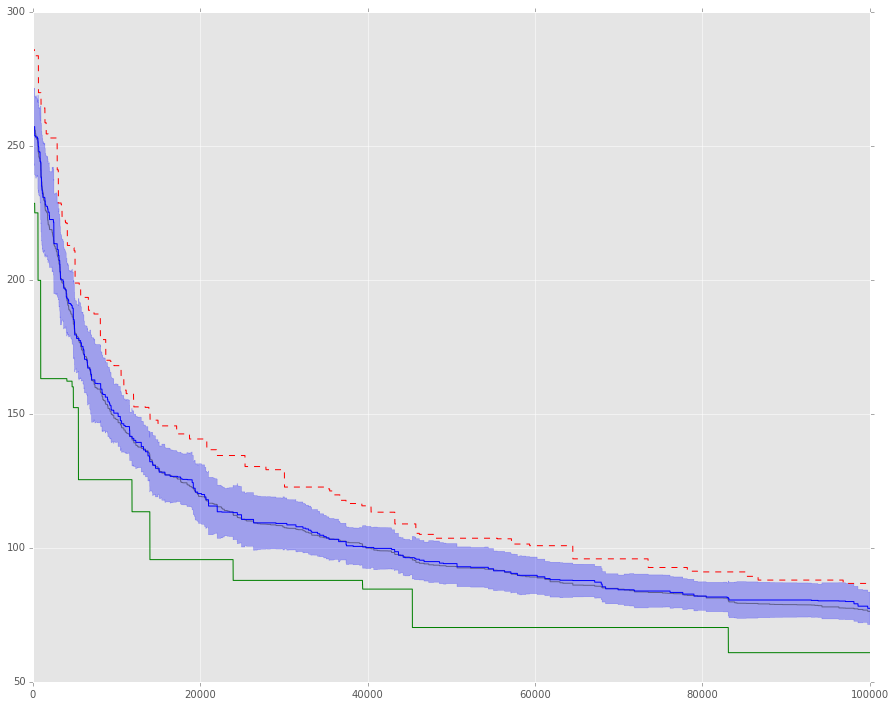

In [20]:
plt.figure(figsize=(15,12))
plt.plot(best, "g")
plt.plot(worst, "r--")
plt.plot(mean, "k", alpha=0.4)
plt.plot(median,"b")
plt.fill_between(xrange(len(np.array(median))),
                 np.array(median)+np.array(std_median),
                 np.array(median)-np.array(std_median),
                 alpha=0.3,
                 color="b")
plt.savefig("DifEv.pdf")
plt.show()

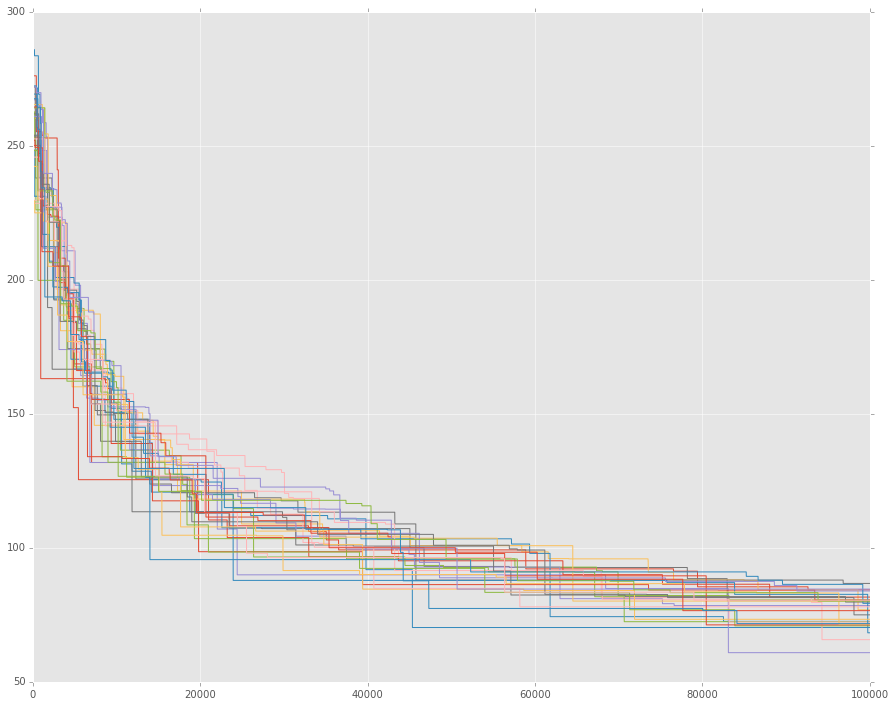

In [21]:
plt.figure(figsize=(15,12))
[plt.plot(dat) for dat in data.T]
plt.show()

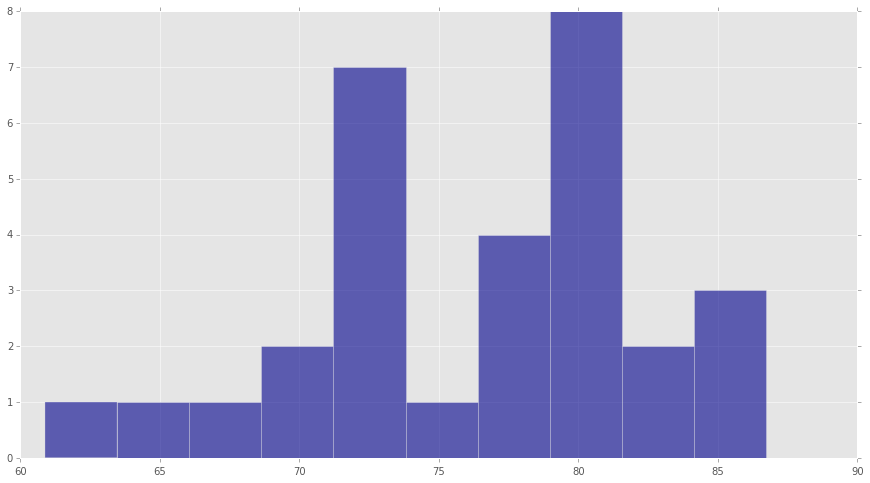

In [24]:
plt.figure(figsize=(15,8))
plt.hist(data[-1,:],color="darkblue", alpha=.6)
plt.show()

In [22]:
print data[-1]
min(data[-1])

[ 84.33305145  70.26796179  60.87682901  80.29856011  76.87469815
  80.60654048  65.73712474  81.63189394  72.55589014  78.46513063
  86.73028448  80.13943829  72.44266876  72.32816072  80.52849663
  68.29474483  83.9118312   79.78539072  73.3340355   70.89847216
  78.00080872  71.25136842  79.29557283  84.61909309  74.99590802
  71.55332689  80.14756352  80.47013307  76.56273101  71.72911761]


60.876829013151564

In [25]:
best_nCorrds_mIters_bit[-1]

[0.84485609770065606,
 2.0347529918652913,
 -0.20675037600989354,
 0.12906201692174948,
 -1.0269917076024737,
 1.095689490061805,
 -0.94601377727894409,
 0.073020681049258462,
 0.98957809788967399,
 2.0829032674917691,
 -1.0695630218106298,
 0.95389010891976289,
 2.044169794744044,
 0.070116910685649514,
 -0.12756542047305164,
 -1.0995419213352426,
 0.92978281997099133,
 0.91191683091476516,
 0.038671391035073034,
 -0.21806211819255017]